**Importing necessary libraries**

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score,mean_squared_error

In [7]:
pip install pandas


In [9]:
import pandas as pd
print(pd.__version__)


2.1.4


 **Dataset**

In [65]:

df = pd.read_csv('car data.csv', encoding='ISO-8859-1')  # Or try 'utf-8-sig'



In [11]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

**Information about Dataset**

In [12]:
df.shape

(301, 9)

In [ ]:
df.head(10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [18]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [19]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [20]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [22]:
df['Owner'].unique()

array([0, 1, 3])

In [44]:
df['Fuel_Type'].replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df['Selling_type'].replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df['Transmission'].replace(regex={"Manual":"0","Automatic":"1"},inplace=True)


In [45]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [28]:
pip install seaborn

In [29]:
import seaborn as sns

In [34]:
pip install matplotlib

In [36]:
import matplotlib.pyplot as plt

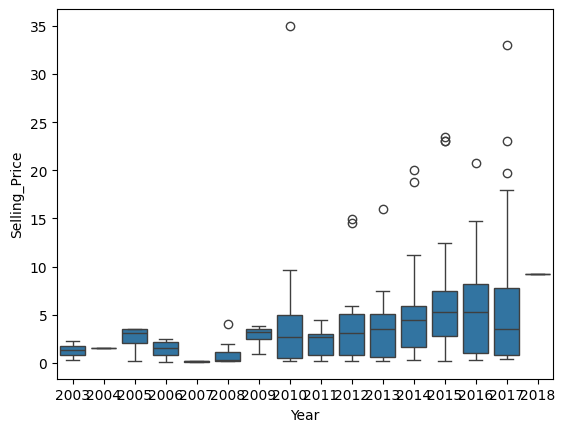

In [37]:
sns.boxplot(x="Year",y="Selling_Price",data=df)
plt.show()

**Taking x and y values**

In [38]:
y=df['Selling_Price']
x=df.drop(['Selling_Price','Car_Name'],axis=1)

In [39]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [46]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [48]:
from sklearn.model_selection import train_test_split


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)


In [52]:
from sklearn.linear_model import LogisticRegression


In [54]:
model = LogisticRegression()


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Or another model like LinearRegression
from sklearn.datasets import load_iris  # Example dataset

# Load example data (Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target (classes)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions with the test data
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)


Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.metrics import mean_squared_error


In [61]:
print("mean squared error : ",mean_squared_error(y_test,y_pred))


mean squared error :  0.03333333333333333


In [63]:
from sklearn.metrics import r2_score


In [64]:
print(r2_score(y_test,y_pred))

0.9381443298969072
